**Testing the codes**
<br><br>
You have to run "pip install ucimlrepo" in your terminal to execute the codes below.

In [149]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



from sklearn.metrics import accuracy_score, roc_auc_score
le = LabelEncoder()


c:\Users\leenr\anaconda3\lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

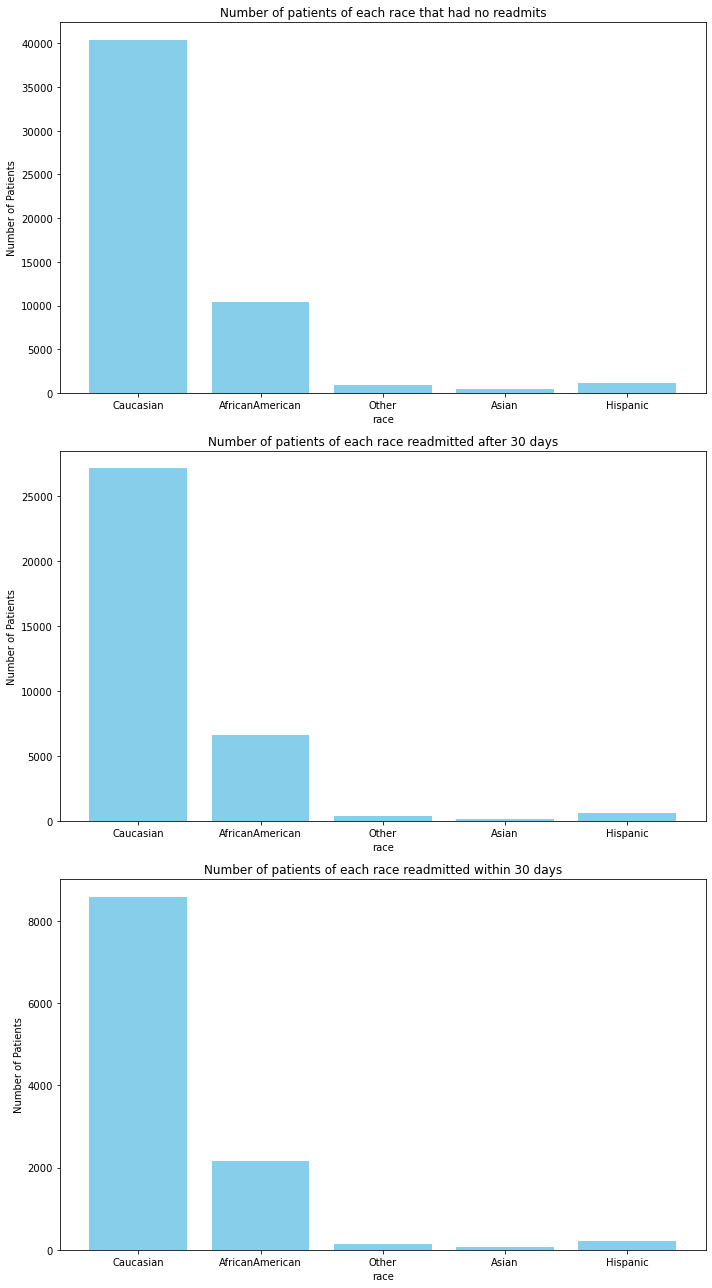

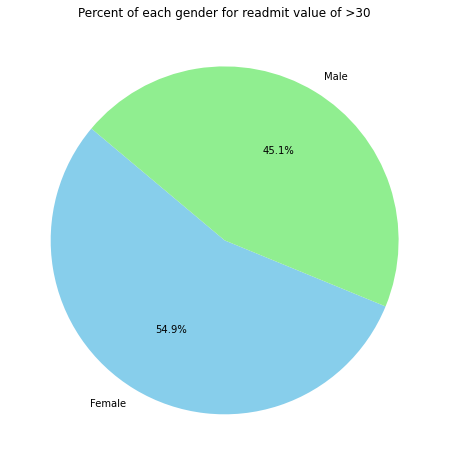

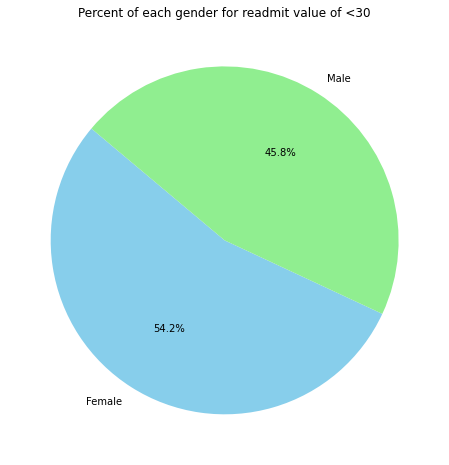

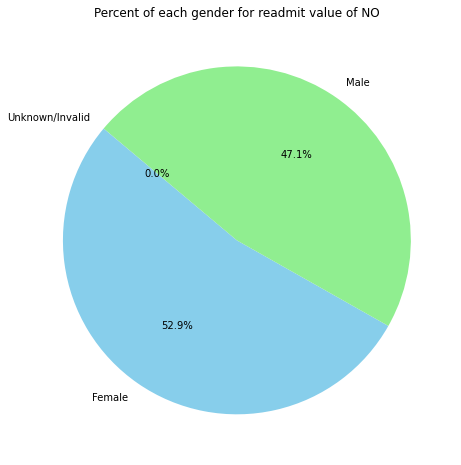

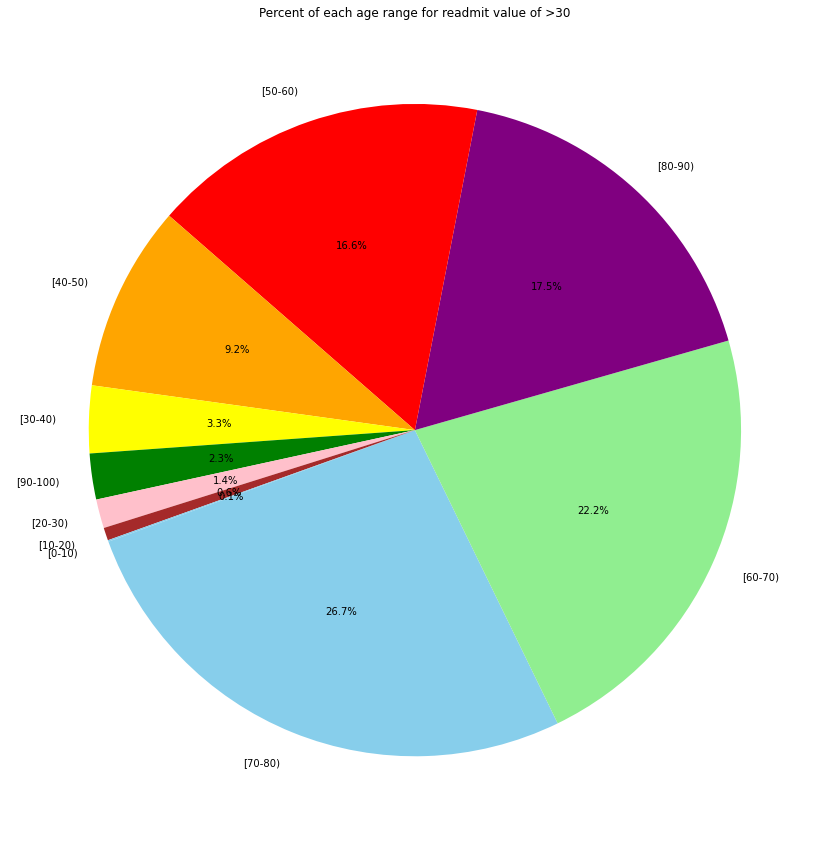

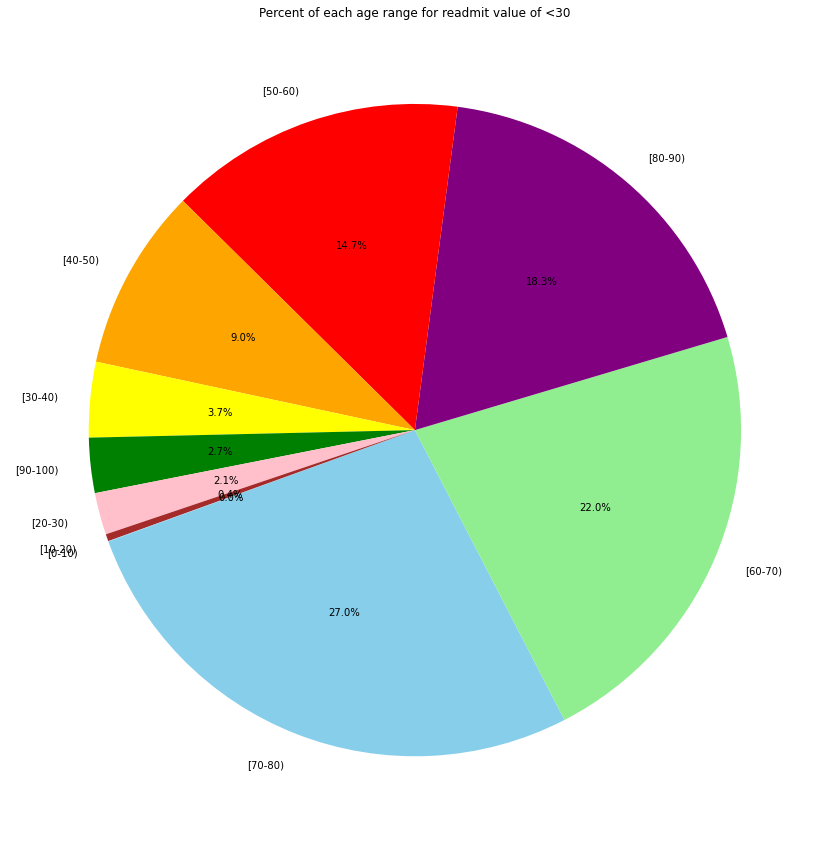

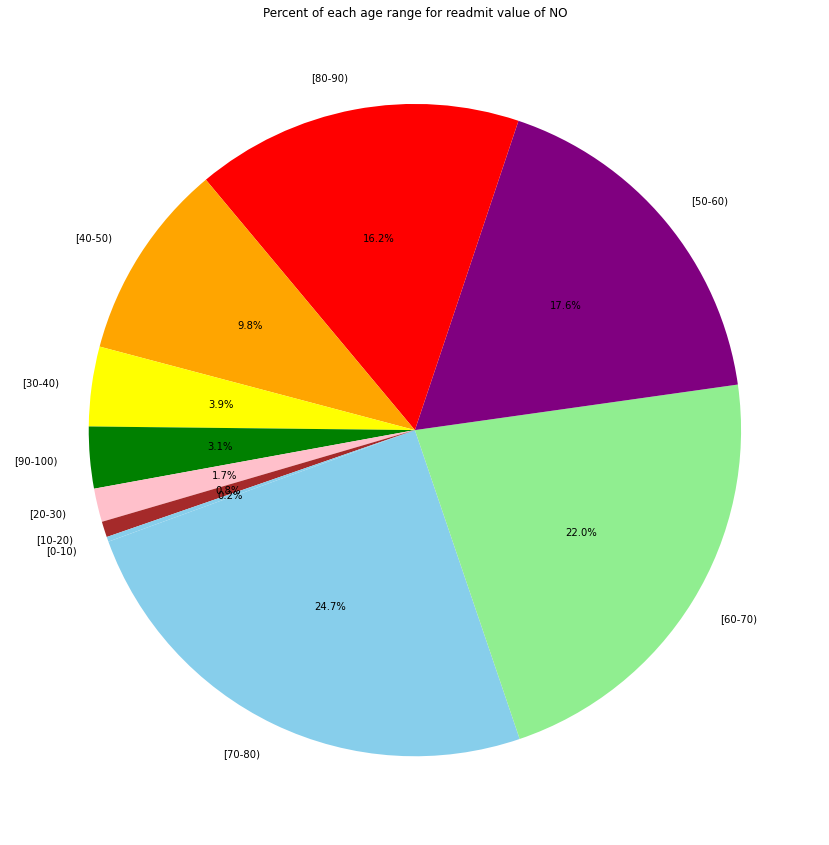

In [61]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
X = X.fillna(0)
main_attributes = ['race', 'gender', 'age', 'number_inpatient', 'number_emergency', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'diabetesMed']
X['race'] = X['race'].fillna('Other')

X['race'] = X['race'].replace(0, "Other")
X['diag_1'] = X['diag_1'].replace(0, "none")
X['diag_2'] = X['diag_2'].replace(0, "none")
X['diag_3'] = X['diag_3'].replace(0, "none")
file_path = "../data/diabetic_data.csv"
df = pd.read_csv(file_path)
print(df.describe())

#greater than 30


def create_plot(ax, label, title):
    counts = []
    labels = []
    for i in X['race'].unique():
        counts.append(df[(df['race'] == i) & (df['readmitted'] == f'{label}')].shape[0])
        labels.append(f'{i}')
    ax.bar(labels, counts, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('race')
    ax.set_ylabel('Number of Patients')
fig, axs = plt.subplots(3, 1, figsize=(10, 18))
create_plot(axs[0], 'NO', 'Number of patients of each race that had no readmits')
create_plot(axs[1], '>30', 'Number of patients of each race readmitted after 30 days')
create_plot(axs[2], '<30', 'Number of patients of each race readmitted within 30 days')
plt.tight_layout()
plt.show()


def gender_pie(label):
    newdf = df[df['readmitted'] == label]
    gender_counts = newdf['gender'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.title(f'Percent of each gender for readmit value of {label}')
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
    plt.show()
    
def age_pie(label):
    newdf = df[df['readmitted'] == label]
    gender_counts = newdf['age'].value_counts()
    plt.figure(figsize=(15, 15))
    plt.title(f'Percent of each age range for readmit value of {label}')
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=200, colors=['skyblue', 'lightgreen', 'purple', 'red', 'orange', 'yellow', 'green', 'pink', 'brown'])
    plt.show()

#X = X[main_attributes]
gender_pie('>30')
gender_pie('<30')
gender_pie('NO')
X = X.dropna()


age_pie('>30')
age_pie('<30')
age_pie('NO')


# X['diag_1'] = X['diag_1'].replace({'NO' : 0, '>30' : 1, '<30' : 2})
# X['diag_2'] = X['diag_2'].replace({'NO' : 0, '>30' : 1, '<30' : 2})
# X['diag_3'] = X['diag_3'].replace({'NO' : 0, '>30' : 1, '<30' : 2})
# X['max_glu_serum'] = X['max_glu_serum'].replace({'normal' : 0, '>200' : 1, '>300' : 2, 'None' : 3})
# X['A1Cresult'] = X['A1Cresult'].replace({'normal' : 0, '>7' : 1, '>8' : 2, 'None' : 3})
# X['diabetesMed'] = X['diabetesMed'].replace({'Yes' : 1, 'No' : 0})


#print(X)


for i in X:
    if X[i].dtype != 'int32':
        X[i] = X[i].astype('category')
       
# metadata 
y = y.replace({'NO' : 0, '>30' : 1, '<30' : 2})





In [124]:
X['weight'] = X['weight'].replace(0, '0')
Xattr = ['race', 'gender', 'weight', 'diabetesMed']
x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
x_tr, x_v, y_tr, y_v = train_test_split(x_tr, y_tr, test_size=0.2)
for i in x_tr:
    if x_tr[i].dtype != 'int32':
        x_tr[i] = x_tr[i].astype(str)
        x_v[i] = x_v[i].astype(str)
        x_te[i] = x_te[i].astype(str)
        x_tr[i] = le.fit_transform(x_tr[i])
        x_v[i] = le.fit_transform(x_v[i])
        x_te[i] = le.fit_transform(x_te[i])
    
# print(x_tr)

scalar = StandardScaler()
scalar.fit(x_tr)
x_tr_scaled = scalar.transform(x_tr)
x_v_scaled = scalar.transform(x_v)
x_te_scaled = scalar.transform(x_te)


In [114]:
#     # append error rates to the following lists
# tr_err_lr = [] # training error rates for Logistic Regression
# te_err_lr = [] # testing error rates for Logistic Regression

# ### YOUR CODE STARTS HERE ###

# # iter = [50, 100, 150, 200]



#Training Regression on entire set:
lr = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100, 150, 200],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [300, 500, 1000, 2000],
    'fit_intercept' : [False, True],
    'class_weight' : ['balanced']
    
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_tr_scaled, y_tr.to_numpy().ravel())
best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_

y_tr_pred = best_model.predict(x_tr_scaled)
y_te_pred = best_model.predict(x_v_scaled)
print(accuracy_score(y_tr_pred, y_tr))
print(accuracy_score(y_te_pred, y_v))

# print(np.unique(y_te_pred))
# tr_err_lr.append(1-np.mean(y_tr_pred == y_tr.to_numpy()))
# te_err_lr.append(1-np.mean(y_te_pred == y_v.to_numpy()))
# print("------------------------------------------------------------------------")
# print(tr_err_lr)
# print(te_err_lr)


# plt.figure(figsize=(10, 6))

#     # Plot training and testing errors for MLP


#     # Plot training and testing errors for Logistic Regression
# plt.semilogx(iter, tr_err_lr, label='Logistic Regression Training Error', marker='x')
# plt.semilogx(iter, te_err_lr, label='Logistic Regression Testing Error', marker='x')

# plt.xlabel('Num. Training Data Points')
# plt.ylabel('Error Rate')

# plt.legend()


C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\leenr\AppData\Roaming

{'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
0.5417248844600715
0.544310016581711


C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2520 fits failed out of a total of 5600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\leenr\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 

Training Accuracy:  0.5630517895254035
Validation Test Accuracy:  0.5670331020082294
Final Test Accuracy:  0.568586027316498


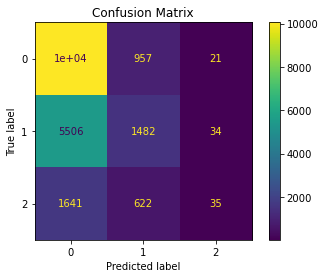

In [150]:
lr = LogisticRegression(max_iter=300, C=0.01, solver='liblinear', penalty='l1', fit_intercept=True, class_weight='balanced')
lr.fit(x_tr_scaled, y_tr.to_numpy().ravel())
y_tr_pred = lr.predict(x_tr_scaled)
y_te_pred = lr.predict(x_v_scaled)
final_te_pred = lr.predict(x_te_scaled)
print('Training Accuracy: ', accuracy_score(y_tr_pred, y_tr))
print('Validation Test Accuracy: ', accuracy_score(y_te_pred, y_v))
print('Final Test Accuracy: ', accuracy_score(final_te_pred, y_te))

cm = confusion_matrix(y_te, final_te_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()



Training Accuracy:  0.5656159314591043
Validation Test Accuracy:  0.5602161763802739
Final Test Accuracy:  0.5678982018276506


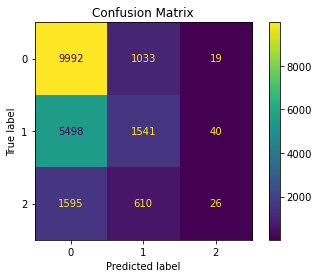

In [157]:
#final test General Model

#final test_smaller Model
Xfilter = X[main_attributes]
x_tr, x_te, y_tr, y_te = train_test_split(Xfilter, y, test_size=0.2)
x_tr, x_v, y_tr, y_v = train_test_split(x_tr, y_tr, test_size=0.2)
for i in x_tr:
    if x_tr[i].dtype != 'int32':
        x_tr[i] = x_tr[i].astype(str)
        x_v[i] = x_v[i].astype(str)
        x_te[i] = x_te[i].astype(str)
        x_tr[i] = le.fit_transform(x_tr[i])
        x_v[i] = le.fit_transform(x_v[i])
        x_te[i] = le.fit_transform(x_te[i])
    
# print(x_tr)

scalar = StandardScaler()
scalar.fit(x_tr)
x_tr_scaled = scalar.transform(x_tr)
x_v_scaled = scalar.transform(x_v)
x_te_scaled = scalar.transform(x_te)

#trying same model on a smaller number of features we deemed as most important
lr = LogisticRegression(max_iter=300, C=0.01, solver='liblinear', penalty='l1', fit_intercept=True, class_weight='balanced')
lr.fit(x_tr_scaled, y_tr.to_numpy().ravel())
y_tr_pred = lr.predict(x_tr_scaled)
y_te_pred = lr.predict(x_v_scaled)
final_te_pred = lr.predict(x_te_scaled)
print('Training Accuracy: ', accuracy_score(y_tr_pred, y_tr))
print('Validation Test Accuracy: ', accuracy_score(y_te_pred, y_v))
print('Final Test Accuracy: ', accuracy_score(final_te_pred, y_te))
cm = confusion_matrix(y_te, final_te_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

